In [1]:
import pandas as pd
import os
import h5py
import seaborn as sns

In [2]:
# Number of models per cytokine
1+3*(11-1)+12

43

In [3]:
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/pbmc_new_cytokine"

In [4]:
def get_donors_in_train(csv_file: str) -> int:
    file = csv_file.split(".")[0]
    file_path = os.path.join(data_dir, f"{file}_preds.h5ad")
    with h5py.File(file_path, "r") as f:
    
        if "uns" in f:
            uns = {}
            for key in f["uns"].keys():
                uns[key] = f["uns"][key][()]
        else:
            raise ValueError(f"Error for {csv_file}")

    return [uns['donors_in_train']]

In [5]:
#preds = []
#for el in os.listdir(data_dir):
#    if el.endswith("_preds.h5ad"):
#        preds.append(el)
       

In [6]:
#import json 

#with open("/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/pbmc_new_cytokine/all_preds.json", "w") as file:
#    json.dump(preds, file)


In [40]:
df_res = pd.DataFrame(columns=["wandb_name", "cytokine", "donor", "ood_mmd", "ood_e_distance", "decoded_ood_r_squared", "num_donors", "donors_in_train"])

i=0
for el in os.listdir(data_dir):
    if el.endswith(".csv"):
        if len(el.split("_")) < 4:
            continue
        print(el)
        wandb_name = [el.split("_")[0]]
        cytokine = [el.split("_")[-2]]
        num_donors = [int(el.split("_")[-1].split(".")[0])]
        donor = [el.split("_")[-3]]
        metrics = list(pd.read_csv(os.path.join(data_dir, el)).set_index("Unnamed: 0").loc[["ood_mmd", "ood_e_distance", "decoded_ood_r_squared"]].squeeze())
        #num_donors = [get_num_donors_in_train(el)]
        donors_in_train = get_donors_in_train(el)
        df_res.loc[i] = wandb_name + cytokine + donor + metrics + num_donors + donors_in_train
        i+=1

bumbling-sound-220_Donor11_ADSF_4.csv
fancy-firefly-306_Donor4_BAFF_4.csv
atomic-firefly-175_Donor11_4-1BBL_3.csv
pretty-monkey-270_Donor10_APRIL_6.csv
dark-flower-174_Donor11_4-1BBL_2.csv
gallant-totem-302_Donor11_BAFF_3.csv
earnest-fog-89_Donor12_C5a_2.csv
atomic-snowball-437_Donor7_OSM_6.csv
good-shape-438_Donor6_OSM_6.csv
chocolate-pine-390_Donor10_Noggin_4.csv
usual-surf-428_Donor1_OSM_3.csv
lemon-surf-264_Donor5_APRIL_4.csv
balmy-field-478_Donor4_OX40L_6.csv
usual-deluge-477_Donor6_OX40L_5.csv
stellar-wood-222_Donor5_ADSF_4.csv
faithful-brook-45_Donor9_IFN-epsilon_2.csv
volcanic-shadow-253_Donor3_APRIL_0.csv
splendid-firebrand-88_Donor5_C5a_1.csv
treasured-meadow-414_Donor2_Noggin_11.csv
mild-paper-317_Donor12_BAFF_8.csv
amber-lake-470_Donor11_OX40L_2.csv
treasured-aardvark-472_Donor4_OX40L_3.csv
amber-lake-470_Donor6_OX40L_2.csv
cosmic-sun-575_Donor10_IL-15_10.csv
exalted-dawn-44_Donor12_IFN-epsilon_0.csv
vivid-moon-249_Donor5_ADSF_11.csv
young-gorge-572_Donor2_IL-15_8.csv
atomi

In [37]:
df_res.head()

,wandb_name,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_donors,donors_in_train
0,bumbling-sound-220,ADSF,Donor11,0.000351,5.668417,0.980433,4,"[b'Donor12', b'Donor3', b'Donor4', b'Donor5']"
1,fancy-firefly-306,BAFF,Donor4,0.000393,3.345567,0.986852,4,"[b'Donor12', b'Donor1', b'Donor5', b'Donor6']"
2,atomic-firefly-175,4-1BBL,Donor11,0.000930,12.243304,0.961728,3,"[b'Donor12', b'Donor2', b'Donor8']"
3,pretty-monkey-270,APRIL,Donor10,0.001248,21.105317,0.962782,6,"[b'Donor2', b'Donor3', b'Donor5', b'Donor6', b..."
4,dark-flower-174,4-1BBL,Donor11,0.001072,13.226905,0.960400,2,"[b'Donor4', b'Donor6']"


In [38]:
df_res[df_res["cytokine"]=="ADSF"]["num_donors"].value_counts()

num_donors
1     33
2     30
3     27
4     24
5     21
6     18
7     15
0     12
8     12
11    11
9      9
10     6
Name: count, dtype: int64

In [41]:
df_res["cytokine"].value_counts()

cytokine
ADSF           219
BAFF           219
4-1BBL         219
APRIL          219
C5a            219
OSM            219
Noggin         219
OX40L          219
IFN-epsilon    219
IL-15          219
IFN-beta       219
IL-13          219
Name: count, dtype: int64

In [24]:
ls = [set(list(el)) for el in dict(df_res[(df_res["cytokine"]=="IL-13")&(df_res["num_donors"]==11)]["donors_in_train"]).values()]
        

In [25]:
len(ls)

13

In [34]:
i=0
for i,el1 in enumerate(ls):
    for j,el2 in enumerate(ls):
        if (el1==el2) and (i!=j):
            print(i,j)

6 12
12 6


In [36]:
df_res[(df_res["cytokine"]=="IL-13")&(df_res["num_donors"]==11)]

,wandb_name,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_donors,donors_in_train
260,pleasant-lake-539,IL-13,Donor12,0.000542,17.280438,0.940753,11,"[b'Donor10', b'Donor11', b'Donor1', b'Donor2',..."
312,misunderstood-silence-545,IL-13,Donor7,0.000276,4.383233,0.978824,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."
509,revived-sun-537,IL-13,Donor10,0.000676,7.550539,0.957626,11,"[b'Donor11', b'Donor12', b'Donor1', b'Donor2',..."
577,radiant-aardvark-536,IL-13,Donor11,0.000742,10.985526,0.924904,11,"[b'Donor10', b'Donor12', b'Donor1', b'Donor2',..."
778,fancy-brook-541,IL-13,Donor3,0.000878,19.837891,0.953362,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."
972,swept-durian-543,IL-13,Donor5,0.000354,14.771015,0.963967,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."
1086,copper-darkness-600,IL-13,Donor9,0.000293,1.918525,0.973352,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."
1474,astral-sponge-546,IL-13,Donor8,0.000664,14.702518,0.950881,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."
1716,ethereal-planet-538,IL-13,Donor2,0.000753,24.125025,0.941675,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."
1821,genial-sponge-544,IL-13,Donor6,0.000463,23.978020,0.945941,11,"[b'Donor10', b'Donor11', b'Donor12', b'Donor1'..."


In [11]:
"copper-darkness-600"

num_donors
1     396
2     360
3     324
4     288
5     252
6     216
7     180
11    145
0     144
8     144
9     108
10     72
Name: count, dtype: int64

In [37]:
import os
import glob

# Specify the directory path
directory_path = data_dir
# Search for files containing the string "copper-darkness-600"
files_to_delete = glob.glob(os.path.join(directory_path, "*copper-darkness-600*"))


In [159]:
idcs = []
for idx, config in adata_rest.uns["split_info"].items():
    if not set(sorted([el for el in config['donors_to_train_data']])) in result:
        idcs.append(int(idx))
    

In [160]:
idcs

[42]

<Axes: xlabel='num_donors', ylabel='decoded_ood_r_squared'>

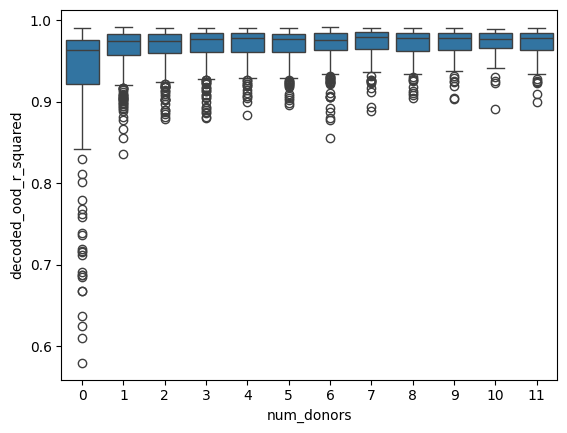

In [11]:
sns.boxplot(df_res, x="num_donors", y="decoded_ood_r_squared")

In [165]:
df_res[df_res["num_donors"]==11]["ood_e_distance"].mean()

9.611416907254466

<Axes: xlabel='num_donors', ylabel='ood_mmd'>

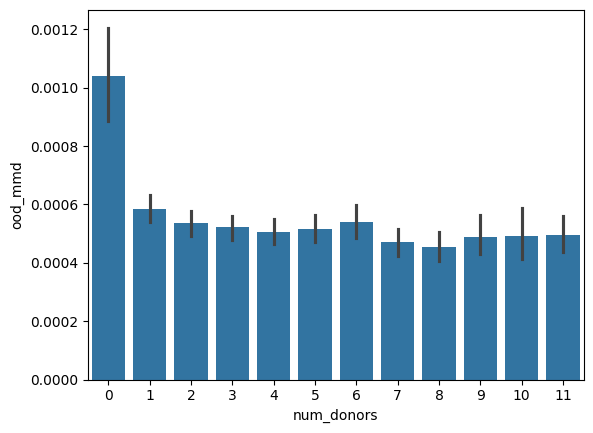

In [12]:
sns.barplot(df_res, x="num_donors", y="ood_mmd")

<Axes: xlabel='num_donors', ylabel='ood_e_distance'>

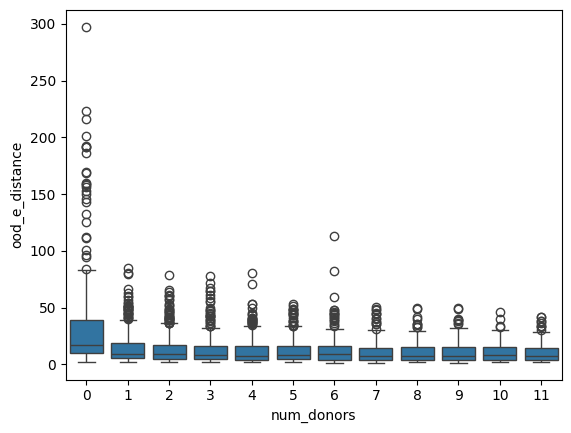

In [13]:
sns.boxplot(df_res, x="num_donors", y="ood_e_distance")

In [17]:
df_res["cytokine"].value_counts()

cytokine
CD27L          436
ADSF           218
BAFF           218
4-1BBL         218
APRIL          218
C5a            218
OSM            218
Noggin         218
OX40L          218
IFN-epsilon    218
IL-15          218
IFN-beta       218
IL-13          218
Name: count, dtype: int64

# Only for IFN-beta

In [11]:
df_ifn_beta = df_res[df_res["cytokine"]=="CD27L"]

<Axes: xlabel='num_donors', ylabel='decoded_ood_r_squared'>

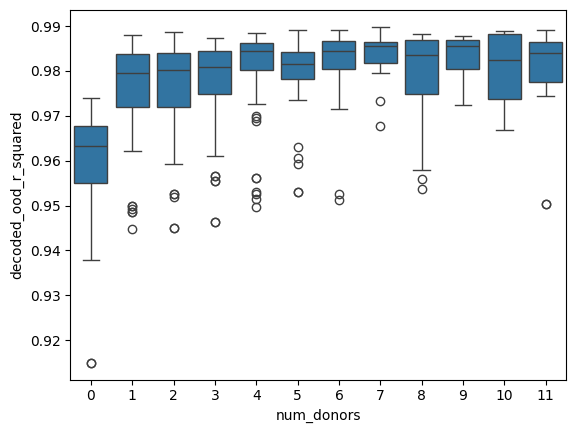

In [12]:
sns.boxplot(df_ifn_beta, x="num_donors", y="decoded_ood_r_squared")

<Axes: xlabel='num_donors', ylabel='ood_mmd'>

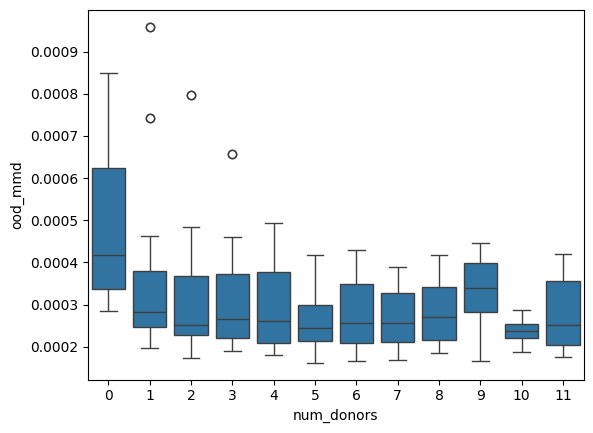

In [13]:
sns.boxplot(df_ifn_beta, x="num_donors", y="ood_mmd")

# Only for IFN-epsilon

In [17]:
df_ifn_eps = df_res[df_res["cytokine"]=="IFN-epsilon"]

<Axes: xlabel='num_donors', ylabel='ood_mmd'>

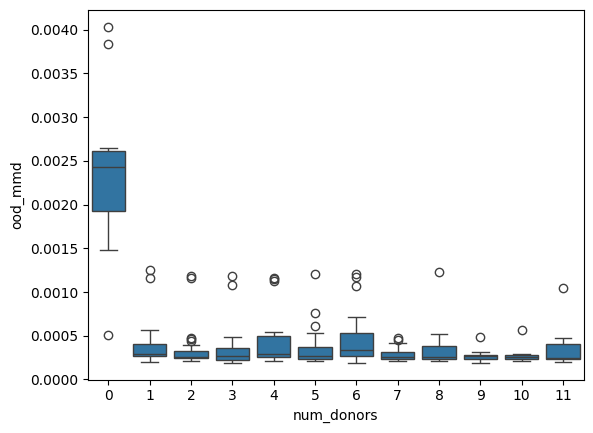

In [18]:
sns.boxplot(df_ifn_eps, x="num_donors", y="ood_mmd")

<Axes: xlabel='num_donors', ylabel='decoded_ood_r_squared'>

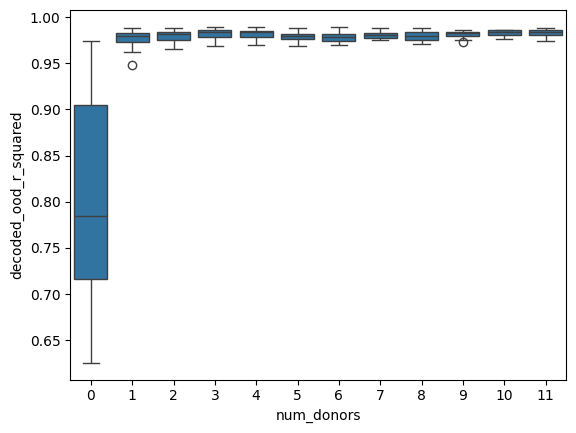

In [19]:
sns.boxplot(df_ifn_eps, x="num_donors", y="decoded_ood_r_squared")

<Axes: xlabel='num_donors', ylabel='decoded_ood_r_squared'>

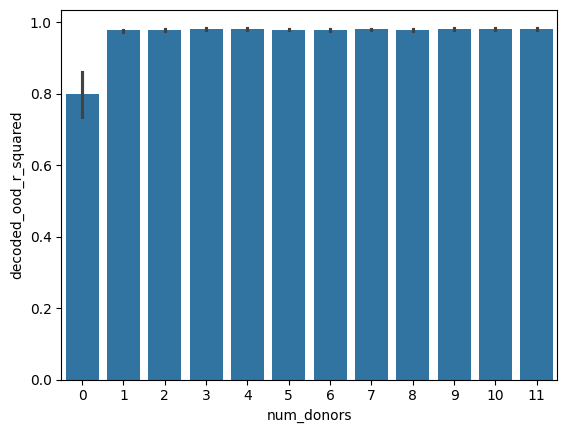

In [51]:
sns.barplot(df_ifn_eps, x="num_donors", y="decoded_ood_r_squared")

# Only for Donor 1

In [20]:
df_d1 = df_res[df_res["donor"]=="Donor1"]

In [21]:
df_d1["num_donors"].value_counts()

num_donors
1     37
2     36
3     30
4     23
6     20
5     18
7     17
9     14
11    13
0     13
8      8
10     6
Name: count, dtype: int64

<Axes: xlabel='num_donors', ylabel='decoded_ood_r_squared'>

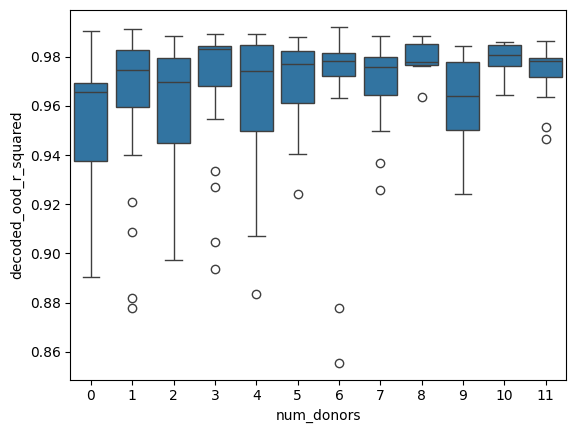

In [23]:
sns.boxplot(df_d1, x="num_donors", y="decoded_ood_r_squared")

<Axes: xlabel='num_donors', ylabel='ood_mmd'>

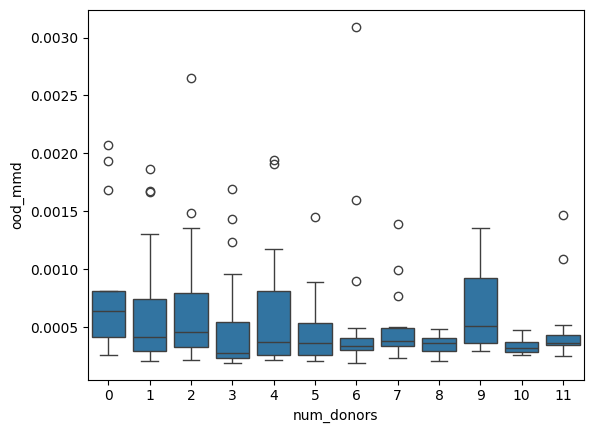

In [24]:
sns.boxplot(df_d1, x="num_donors", y="ood_mmd")

# Only for Donor 2

In [52]:
df_d2 = df_res[df_res["donor"]=="Donor4"]

<Axes: xlabel='num_donors', ylabel='decoded_ood_r_squared'>

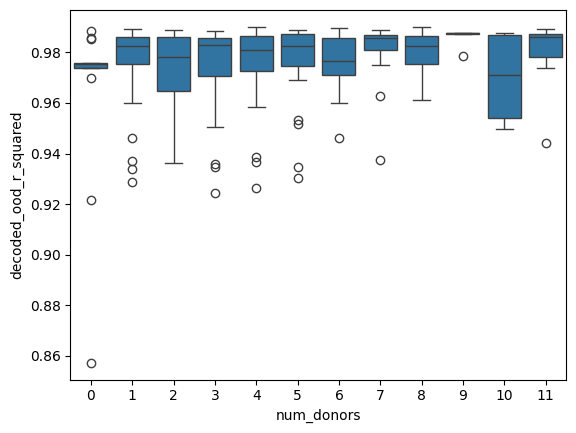

In [53]:
sns.boxplot(df_d2, x="num_donors", y="decoded_ood_r_squared")

<Axes: xlabel='num_donors', ylabel='ood_mmd'>

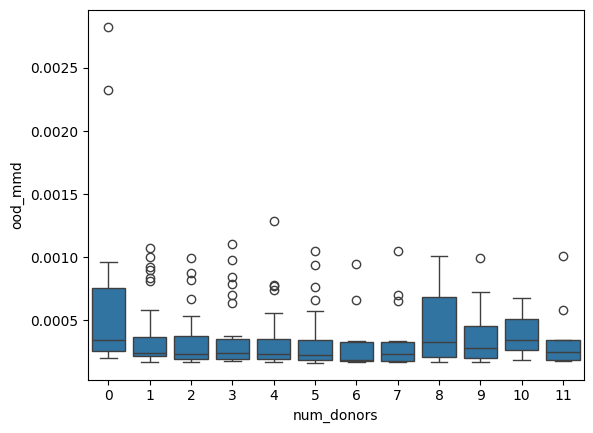

In [27]:
sns.boxplot(df_d2, x="num_donors", y="ood_mmd")

In [28]:
df_res

,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_donors,donors_in_train
0,ADSF,Donor11,0.000351,5.668417,0.980433,4,"[b'Donor12', b'Donor3', b'Donor4', b'Donor5']"
1,CD27L,Donor7,0.000208,2.902274,0.983814,3,"[b'Donor12', b'Donor2', b'Donor9']"
2,BAFF,Donor4,0.000393,3.345567,0.986852,4,"[b'Donor12', b'Donor1', b'Donor5', b'Donor6']"
3,4-1BBL,Donor11,0.000930,12.243304,0.961728,3,"[b'Donor12', b'Donor2', b'Donor8']"
4,APRIL,Donor10,0.001248,21.105317,0.962782,6,"[b'Donor2', b'Donor3', b'Donor5', b'Donor6', b..."
...,...,...,...,...,...,...,...
2822,C5a,Donor6,0.000400,16.141060,0.962497,6,"[b'Donor10', b'Donor1', b'Donor2', b'Donor4', ..."
2823,Noggin,Donor11,0.000368,5.526193,0.977623,2,"[b'Donor8', b'Donor9']"
2824,IL-13,Donor12,0.000561,18.224097,0.939325,7,"[b'Donor11', b'Donor2', b'Donor4', b'Donor5', ..."
2825,BAFF,Donor3,0.000310,4.773738,0.987325,3,"[b'Donor1', b'Donor7', b'Donor9']"


# Check if we have a significant dependence of model accuracy of donors being included

In [170]:
df_res.head()

,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_donors,donors_in_train
0,ADSF,Donor11,0.000351,5.668417,0.980433,4,"[b'Donor12', b'Donor3', b'Donor4', b'Donor5']"
1,CD27L,Donor7,0.000208,2.902274,0.983814,3,"[b'Donor12', b'Donor2', b'Donor9']"
2,BAFF,Donor4,0.000393,3.345567,0.986852,4,"[b'Donor12', b'Donor1', b'Donor5', b'Donor6']"
3,4-1BBL,Donor11,0.000930,12.243304,0.961728,3,"[b'Donor12', b'Donor2', b'Donor8']"
4,APRIL,Donor10,0.001248,21.105317,0.962782,6,"[b'Donor2', b'Donor3', b'Donor5', b'Donor6', b..."


In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


def get_donor_importance(df_res: pd.DataFrame, donor: str, target_variable: str = "decoded_ood_r_squared"):
    all_donors = df_res["donor"].unique()
    df_d = df_res[df_res["donor"]==donor]
    for d in all_donors:
        df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)

    for num_donor in df_res["num_donors"].unique():
        df_d[f"{num_donor}_present"] = df_d.apply(lambda x: x["num_donors"] == num_donor, axis=1)
    
    cols = [f"{d}_present" for d in all_donors if d!=donor] + [f"{num_donor}_present" for num_donor in df_res["num_donors"].unique()] 
    X = df_d[cols]
    y = df_d[target_variable]
    X = sm.add_constant(X)
    model = sm.OLS(y.values, np.float64(X.values)).fit()
    coefficients = model.params
    p_values = model.pvalues
    
    feature_stats = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefficients,
        'P-Value': p_values
    }).sort_values(by='P-Value')
    return feature_stats


In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


def get_donor_importance(df_res: pd.DataFrame, donor: str, target_variable: str = "decoded_ood_r_squared", alpha: float = 0.1):
    # Get unique donors
    all_donors = df_res["donor"].unique()
    
    # Filter for the specific donor
    df_d = df_res[df_res["donor"] == donor]
    
    # Create binary columns for donors in training
    for d in all_donors:
        df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)
    
    # Create binary columns for number of donors
    for num_donor in df_d["num_donors"].unique():
        df_d[f"{num_donor}_present"] = df_d.apply(lambda x: x["num_donors"] == num_donor, axis=1)
    
    # Define feature columns
    cols = [f"{d}_present" for d in all_donors if d != donor] + \
           [f"{num_donor}_present" for num_donor in df_d["num_donors"].unique()]
    
    # Prepare feature matrix and target variable
    X = df_d[cols]
    y = df_d[target_variable]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    
    # Extract coefficients
    coefficients = lasso.coef_
    intercept = lasso.intercept_
    
    # Create a DataFrame with feature importance
    feature_stats = pd.DataFrame({
        'Feature': cols,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Add the intercept for completeness
    feature_stats.loc[len(feature_stats)] = ['Intercept', intercept]
    
    return feature_stats


In [33]:
df_res.head()

,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_donors,donors_in_train
0,ADSF,Donor11,0.000351,5.668417,0.980433,4,"[b'Donor12', b'Donor3', b'Donor4', b'Donor5']"
1,CD27L,Donor7,0.000208,2.902274,0.983814,3,"[b'Donor12', b'Donor2', b'Donor9']"
2,BAFF,Donor4,0.000393,3.345567,0.986852,4,"[b'Donor12', b'Donor1', b'Donor5', b'Donor6']"
3,4-1BBL,Donor11,0.000930,12.243304,0.961728,3,"[b'Donor12', b'Donor2', b'Donor8']"
4,APRIL,Donor10,0.001248,21.105317,0.962782,6,"[b'Donor2', b'Donor3', b'Donor5', b'Donor6', b..."


In [53]:
donor_cols = [f"{d}_present" for d in df_res["donor"].unique()] + [f"{num_donor}_present" for num_donor in df_res["num_donors"].unique()] 
df_pvals = pd.DataFrame(columns=donor_cols)
df_c = pd.DataFrame(columns=donor_cols)
for donor in df_res["donor"].unique():
    d = get_donor_importance(df_res, donor, "decoded_ood_r_squared", alpha=0.0005).set_index("Feature")
    d.loc[f"{donor}_present"] = None
    #df_pvals.loc[donor] = d.loc[donor_cols]["P-Value"]
    df_c.loc[donor] = d.loc[donor_cols]["Coefficient"]
    

/tmp/ipykernel_2154944/2207591824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)
/tmp/ipykernel_2154944/2207591824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)
/tmp/ipykernel_2154944/2207591824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [45]:
df_c

,Donor11_present,Donor7_present,Donor4_present,Donor10_present,Donor12_present,Donor2_present,Donor6_present,Donor1_present,Donor5_present,Donor9_present,...,6_present,2_present,8_present,5_present,0_present,1_present,11_present,10_present,9_present,7_present
Donor11,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.003607,-0.0,0.0,0.0,0.0,0.0
Donor7,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.004194,0.0,0.0,0.0,0.0,0.0
Donor4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.000000,0.0,0.0,-0.0,0.0,0.0
Donor10,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.000000,-0.0,0.0,0.0,0.0,0.0
Donor12,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.005927,-0.0,0.0,0.0,0.0,0.0
Donor2,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.001968,0.0,0.0,0.0,-0.0,0.0
Donor6,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.000531,-0.0,0.0,0.0,0.0,-0.0
Donor1,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.000000,-0.0,0.0,0.0,-0.0,0.0
Donor5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,-0.0,-0.003007,-0.0,0.0,0.0,0.0,0.0
Donor9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,-0.0,0.0,0.0,-0.005715,-0.0,0.0,0.0,0.0,0.0


In [46]:
(df_c!=0).sum(axis=0)

Donor11_present    1
Donor7_present     1
Donor4_present     1
Donor10_present    1
Donor12_present    1
Donor2_present     1
Donor6_present     1
Donor1_present     1
Donor5_present     1
Donor9_present     1
Donor3_present     1
Donor8_present     1
4_present          0
3_present          0
6_present          0
2_present          0
8_present          0
5_present          0
0_present          8
1_present          0
11_present         0
10_present         0
9_present          0
7_present          0
dtype: int64

<Axes: >

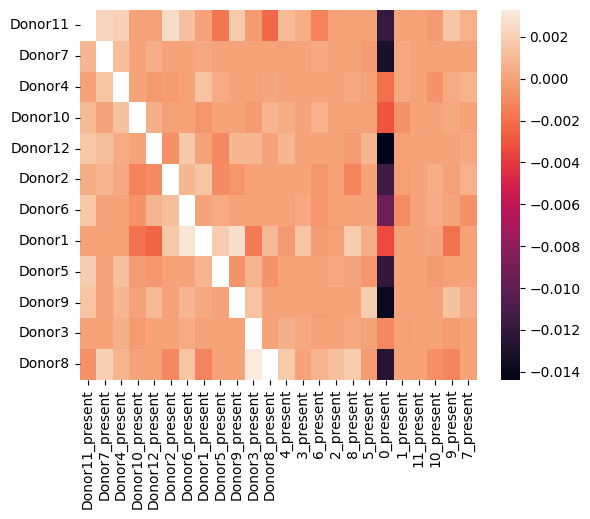

In [54]:
sns.heatmap(df_c)

In [55]:
df_c[df_c<0.0]=0.0

<Axes: >

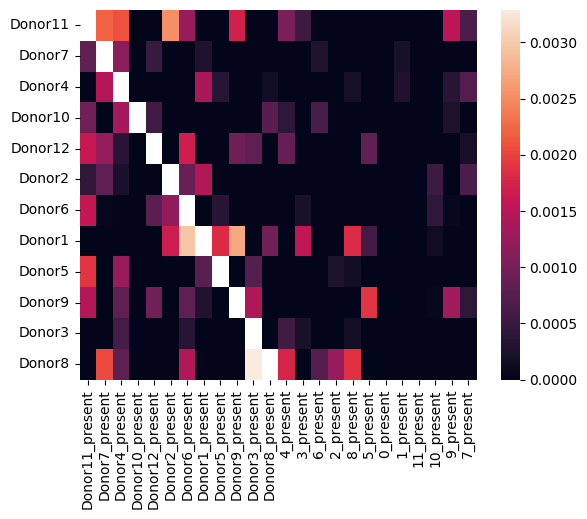

In [56]:
sns.heatmap(df_c)

In [24]:
(df_pvals<0.05/11).sum() # signficance without Bonferroni correction

Donor11_present     0
Donor7_present      0
Donor4_present      0
Donor10_present     0
Donor12_present     0
Donor2_present      0
Donor6_present      0
Donor1_present      0
Donor5_present      0
Donor9_present      0
Donor3_present      0
Donor8_present      0
4_present           0
3_present           0
6_present           0
2_present           0
8_present           0
5_present           0
0_present          12
1_present           0
11_present          0
10_present          0
9_present           0
7_present           0
dtype: int64

In [25]:
(df_pvals<0.05).sum() # signficance without Bonferroni correction

Donor11_present     0
Donor7_present      0
Donor4_present      2
Donor10_present     2
Donor12_present     0
Donor2_present      1
Donor6_present      0
Donor1_present      1
Donor5_present      0
Donor9_present      0
Donor3_present      0
Donor8_present      0
4_present           0
3_present           0
6_present           0
2_present           0
8_present           0
5_present           0
0_present          12
1_present           2
11_present          0
10_present          0
9_present           0
7_present           0
dtype: int64

In [26]:
df_pvals

,Donor11_present,Donor7_present,Donor4_present,Donor10_present,Donor12_present,Donor2_present,Donor6_present,Donor1_present,Donor5_present,Donor9_present,...,6_present,2_present,8_present,5_present,0_present,1_present,11_present,10_present,9_present,7_present
Donor11,NaN,0.499784,0.140938,0.722493,0.673386,0.046751,0.321837,0.939286,0.144841,0.303974,...,0.353377,0.631850,0.483659,0.914885,6.965433e-09,0.759180,0.917591,0.842286,0.297337,0.804667
Donor7,0.452476,NaN,0.239271,0.697583,0.500161,0.818940,0.571097,0.558846,0.936066,0.784855,...,0.722978,0.838740,0.907783,0.754006,2.580909e-10,0.469251,0.893788,0.798734,0.924529,0.773934
Donor4,0.980225,0.203563,NaN,0.889989,0.658034,0.922861,0.380902,0.206264,0.428522,0.675107,...,0.701191,0.472595,0.991395,0.386739,1.529544e-06,0.971408,0.847297,0.375800,0.185639,0.197853
Donor10,0.571208,0.907146,0.793909,NaN,0.068273,0.319985,0.680887,0.024811,0.402146,0.289294,...,0.530620,0.646908,0.753695,0.938701,1.478500e-07,0.022685,0.975413,0.616244,0.837805,0.611507
Donor12,0.143542,0.315977,0.342816,0.861446,NaN,0.457096,0.492131,0.879888,0.161820,0.592915,...,0.772017,0.889402,0.621359,0.474464,3.724295e-10,0.959263,0.936518,0.993627,0.804462,0.613736
Donor2,0.394178,0.330630,0.179982,0.150104,0.406411,NaN,0.727751,0.713926,0.236213,0.289341,...,0.828854,0.936738,0.377717,0.936469,1.326710e-07,0.761779,0.720399,0.962658,0.909744,0.737785
Donor6,0.429170,0.631711,0.866979,0.400970,0.365431,0.525729,NaN,0.863681,0.847187,0.962018,...,0.460461,0.873293,0.725117,0.608843,3.128725e-13,0.442670,0.899772,0.611126,0.960337,0.385684
Donor1,0.717380,0.731377,0.430109,0.048367,0.110043,0.399561,0.200607,NaN,0.166088,0.370341,...,0.282333,0.194590,0.195945,0.422543,2.082698e-05,0.649951,0.915533,0.514749,0.103751,0.867590
Donor5,0.208151,0.770707,0.336493,0.583901,0.581795,0.890021,0.803763,0.597663,NaN,0.511673,...,0.860716,0.781076,0.437089,0.722905,1.204538e-08,0.843092,0.658556,0.780400,0.560857,0.964818
Donor9,0.333242,0.813179,0.286206,0.543055,0.689030,0.996709,0.784793,0.776817,0.855243,NaN,...,0.486483,0.877564,0.773379,0.238054,4.129416e-10,0.873409,0.875345,0.941434,0.631331,0.993293


In [47]:
# Now do this analysis for every cytokine separately
ps={}
df_cs = {}
df_ps = {}

for cyto in df_res["cytokine"].unique():
    df_res_c = df_res[df_res["cytokine"]==cyto]
    donor_cols = [f"{d}_present" for d in df_res_c["donor"].unique()]
    df_pvals = pd.DataFrame(columns=donor_cols)
    df_c = pd.DataFrame(columns=donor_cols)
    for donor in df_res_c["donor"].unique():
        d = get_donor_importance(df_res_c, donor, "ood_mmd").set_index("Feature")
        d.loc[f"{donor}_present"] = None
        df_pvals.loc[donor] = d.loc[donor_cols]["P-Value"]
        df_c.loc[donor] = d.loc[donor_cols]["Coefficient"]
    ps[cyto] = (df_pvals<0.05/11).sum().sum()
    df_ps[cyto] = df_pvals
    df_cs[cyto] = df_c


/tmp/ipykernel_3016015/899926805.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)
/tmp/ipykernel_3016015/899926805.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["donors_in_train"].astype(str), axis=1)
/tmp/ipykernel_3016015/899926805.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [48]:
ps

{'ADSF': 1,
 'CD27L': 7,
 'BAFF': 1,
 '4-1BBL': 2,
 'APRIL': 4,
 'C5a': 1,
 'OSM': 0,
 'Noggin': 1,
 'OX40L': 1,
 'IFN-epsilon': 0,
 'IFN-beta': 0,
 'IL-13': 1}

In [49]:
df_ps['CD27L']

,Donor7_present,Donor2_present,Donor5_present,Donor12_present,Donor9_present,Donor6_present,Donor1_present,Donor8_present,Donor3_present,Donor10_present,Donor4_present,Donor11_present
Donor7,NaN,0.071744,0.911285,0.490037,0.353620,0.953653,0.890036,9.870780e-01,0.632719,0.947270,0.160096,0.999814
Donor2,0.025492,NaN,0.239377,0.863037,0.238032,0.062917,0.205973,1.305661e-01,0.770957,0.737669,0.365346,0.613236
Donor5,0.046897,0.327949,NaN,0.026811,0.538709,0.020933,0.931003,9.406426e-05,0.890599,0.017117,0.326770,0.061015
Donor12,0.033831,0.016759,0.733256,NaN,0.359073,0.280661,0.729514,1.984962e-01,0.666285,0.316396,0.064145,0.324628
Donor9,0.636766,0.017123,0.065984,0.056453,NaN,0.442854,0.361998,6.489734e-01,0.760024,0.286867,0.007639,0.210799
Donor6,0.519093,0.014703,0.465866,0.681550,0.849902,NaN,0.695887,6.397578e-01,0.692401,0.029222,0.779379,0.023586
Donor1,0.000045,0.000171,0.070413,0.174339,0.034987,0.000096,NaN,2.213033e-13,0.405499,0.027445,0.912841,0.004022
Donor8,0.609906,0.223409,0.609177,0.496925,0.598594,0.296616,0.501610,NaN,0.819443,0.394058,0.271848,0.235709
Donor3,0.098421,0.012083,0.412598,0.899788,0.520161,0.225416,0.179006,9.704287e-02,NaN,0.171429,0.018755,0.582295
Donor10,0.783458,0.178376,0.417362,0.424334,0.648489,0.026557,0.161993,1.943763e-03,0.723654,NaN,0.050082,0.086903


In [50]:
df_cs['CD27L']

,Donor7_present,Donor2_present,Donor5_present,Donor12_present,Donor9_present,Donor6_present,Donor1_present,Donor8_present,Donor3_present,Donor10_present,Donor4_present,Donor11_present
Donor7,NaN,-0.000037,0.000002,-0.000012,0.000019,-9.405513e-07,-0.000003,2.612745e-07,-0.000007,0.000002,-0.000029,4.825791e-09
Donor2,-0.000049,NaN,-0.000026,0.000004,0.000031,-3.075944e-05,0.000034,-2.056257e-05,0.000005,-0.000007,-0.000011,-1.239791e-05
Donor5,-0.000017,-0.000011,NaN,-0.000026,0.000006,-2.891717e-05,0.000001,3.758881e-05,-0.000002,0.000036,0.000009,-3.942277e-05
Donor12,-0.000029,-0.000028,-0.000005,NaN,0.000013,-1.050079e-05,0.000006,1.018634e-05,-0.000005,0.000015,-0.000014,-1.582316e-05
Donor9,0.000011,-0.000069,-0.000056,0.000050,NaN,-1.442186e-05,-0.000022,-7.456995e-06,-0.000006,-0.000037,-0.000059,4.732569e-05
Donor6,-0.000012,-0.000049,-0.000016,-0.000005,0.000004,NaN,-0.000008,-6.824278e-06,-0.000007,0.000054,-0.000004,-5.222183e-05
Donor1,-0.000151,-0.000158,-0.000054,-0.000044,0.000095,-1.563640e-04,NaN,3.420537e-04,0.000031,0.000084,-0.000003,-9.506847e-05
Donor8,-0.000018,-0.000050,0.000022,-0.000019,-0.000022,-3.816183e-05,0.000035,NaN,-0.000008,0.000037,-0.000036,-5.239059e-05
Donor3,-0.000046,-0.000065,-0.000026,-0.000003,0.000016,-2.582133e-05,0.000051,-3.898995e-05,NaN,0.000033,-0.000048,1.556284e-05
Donor10,-0.000023,-0.000086,0.000062,0.000052,-0.000031,-1.539659e-04,-0.000123,2.241235e-04,-0.000019,NaN,-0.000109,-1.440552e-04


In [39]:
df_pvals

,Donor8_present,Donor3_present,Donor1_present,Donor9_present,Donor11_present,Donor5_present,Donor12_present,Donor6_present,Donor2_present,Donor7_present,Donor4_present,Donor10_present
Donor8,NaN,0.011237,0.133659,0.605596,0.174373,0.691606,0.922070,0.237615,0.058348,0.848052,0.956500,0.112185
Donor3,0.966189,NaN,0.142145,0.206521,0.866141,0.904220,0.168004,0.405131,0.102518,0.154221,0.400418,0.112328
Donor1,0.595063,0.089532,NaN,0.644648,0.717148,0.677856,0.509268,0.541052,0.547773,0.499899,0.582347,0.786616
Donor9,0.765450,0.161363,0.640398,NaN,0.403875,0.174639,0.210125,0.328424,0.641610,0.294881,0.635940,0.749736
Donor11,0.696855,0.211465,0.622297,0.844334,NaN,0.487812,0.573386,0.720521,0.189558,0.949484,0.898137,0.362629
Donor5,0.209953,0.003120,0.007768,0.390984,0.817104,NaN,0.043410,0.011440,0.006099,0.594514,0.634551,0.004899
Donor12,0.166270,0.054048,0.902067,0.818330,0.661513,0.291522,NaN,0.337773,0.584135,0.402534,0.482616,0.264645
Donor6,0.658125,0.017363,0.021366,0.276609,0.385467,0.942799,0.306433,NaN,0.121617,0.163650,0.419090,0.540349
Donor2,0.381213,0.114746,0.033688,0.554926,0.054946,0.455761,0.066733,0.993814,NaN,0.350486,0.428112,0.633109
Donor7,0.680997,0.346013,0.047862,0.720054,0.143289,0.510654,0.151870,0.882569,0.016443,NaN,0.217355,0.142554


In [40]:
df_c

,Donor8_present,Donor3_present,Donor1_present,Donor9_present,Donor11_present,Donor5_present,Donor12_present,Donor6_present,Donor2_present,Donor7_present,Donor4_present,Donor10_present
Donor8,NaN,-0.000132,0.000071,-0.000028,-0.000062,0.000021,-0.000006,-9.082281e-05,0.000080,-0.000011,-0.000003,-0.000104
Donor3,-0.000010,NaN,0.000143,-0.000162,0.000028,0.000014,-0.000201,1.112832e-04,0.000203,-0.000331,0.000155,-0.000162
Donor1,-0.000383,0.000556,NaN,0.000169,-0.000177,-0.000210,0.000219,-2.684574e-04,-0.000169,0.000441,0.000272,-0.000082
Donor9,-0.000015,-0.000032,-0.000015,NaN,-0.000023,-0.000061,-0.000063,-3.067944e-05,-0.000011,0.000042,-0.000020,0.000011
Donor11,-0.000195,-0.000274,0.000120,-0.000063,NaN,-0.000171,0.000196,-1.648416e-04,0.000293,-0.000020,0.000081,-0.000275
Donor5,-0.000057,0.000077,-0.000076,-0.000027,0.000006,NaN,-0.000089,1.228987e-04,-0.000084,-0.000013,0.000013,0.000115
Donor12,-0.000188,-0.000158,-0.000007,-0.000016,0.000035,-0.000107,NaN,1.231552e-04,-0.000036,0.000185,-0.000111,-0.000138
Donor6,0.000042,-0.000144,0.000126,-0.000075,0.000045,-0.000004,-0.000065,NaN,0.000095,-0.000143,-0.000061,-0.000041
Donor2,-0.000052,-0.000050,0.000065,-0.000022,-0.000071,0.000030,-0.000073,-4.223346e-07,NaN,-0.000045,0.000041,-0.000016
Donor7,-0.000010,0.000011,-0.000043,0.000004,-0.000028,-0.000012,-0.000030,2.629753e-06,-0.000044,NaN,0.000024,-0.000028


# How to recover what is missing

In [ ]:
import scanpy as sc
cytokine_held_out = "IL-13"
adata_rest = sc.read_h5ad(f"/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/new_cytokine/adata_rest_{cytokine_held_out}.h5ad")

len(adata_rest.uns["split_info"]["1"]['donors_to_impute'])

donors_imputed = []

i=0
for el in os.listdir(data_dir):
    if el.endswith(".csv"):
        if len(el.split("_")) < 4:
            continue
        
        cytokine = el.split("_")[-2]
        if cytokine != "IL-13":
            continue
        donors_imputed.append(get_donors_in_train(el))


result = []

# Iterate over the outer list
for j in range(len(donors_imputed)):
    # Iterate over the inner list
    tmp = []
    for i in range(len(donors_imputed[j][0])):
        # Extract and process the element
        processed_value = str(donors_imputed[j][0][i])[2:-1]
        # Append to the result list
        tmp.append(processed_value)
    result.append(set(sorted(tmp)))

idcs = []
for idx, config in adata_rest.uns["split_info"].items():
    if not set(sorted([el for el in config['donors_to_train_data']])) in result:
        idcs.append(int(idx))


print(idcs)